# Categorizing Vivino's Rating under Sommerlier's opinion

In [83]:
import pandas as pd
import numpy as np

import matplotlib. pyplot as plt
import seaborn as sns

In [4]:
wines = pd.read_csv("../data/wines_clean.csv")

In [5]:
wines.drop("Unnamed: 0", axis=1, inplace=True)

In [6]:
wines.head()

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year,WineStyle,Full_Name
0,Pomerol 2011,France,Pomerol,Château La Providence,4.2,100,95.00,2011,red,Pomerol 2011 Château La Providence red
1,Lirac 2017,France,Lirac,Château Mont-Redon,4.3,100,15.50,2017,red,Lirac 2017 Château Mont-Redon red
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015,red,Erta e China Rosso di Toscana 2015 Renzo Masi red
3,Bardolino 2019,Italy,Bardolino,Cavalchina,3.5,100,8.72,2019,red,Bardolino 2019 Cavalchina red
4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016,red,Ried Scheibner Pinot Noir 2016 Markowitsch red


### Let's compare Vivino's Rating with a renowned Sommelier's opinion: Robert Parker
https://www.meejana.co.uk/wine-rating-robert-parker-vs-vivino/

#### This is how Robert Parker classifies Vivino's rating:

![title](../images/robert_parker.png)

#### Function that categorizes according to Robert Parker's criteria

In [7]:
def categorySomm(rating):
    if 4.9 <= rating:
        return "Extraordinary"
    if (3.9 <= rating) & (rating <= 4.8):
        return "Outstanding"
    if (3.0 <= rating) & (rating <= 3.8):
        return "Above Average to Very Good"
    if (2.0 <= rating) & (rating <= 2.9):
        return "Average"
    if (1.0 <= rating) & (rating <= 1.9):
        return "Below Average"
    if (0.0 <= rating) & (rating <= 0.9):
        return "Unacceptable"
    return "other"

In [8]:
wines["Rating_Somm"] = wines["Rating"].apply(categorySomm)

In [9]:
wines

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year,WineStyle,Full_Name,Rating_Somm
0,Pomerol 2011,France,Pomerol,Château La Providence,4.2,100,95.00,2011,red,Pomerol 2011 Château La Providence red,Outstanding
1,Lirac 2017,France,Lirac,Château Mont-Redon,4.3,100,15.50,2017,red,Lirac 2017 Château Mont-Redon red,Outstanding
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015,red,Erta e China Rosso di Toscana 2015 Renzo Masi red,Outstanding
3,Bardolino 2019,Italy,Bardolino,Cavalchina,3.5,100,8.72,2019,red,Bardolino 2019 Cavalchina red,Above Average to Very Good
4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016,red,Ried Scheibner Pinot Noir 2016 Markowitsch red,Outstanding
...,...,...,...,...,...,...,...,...,...,...,...
13829,Côte des Roses Rosé 2019,France,Languedoc,Gérard Bertrand,3.9,1750,9.36,2019,rose,Côte des Roses Rosé 2019 Gérard Bertrand rose,Outstanding
13830,M Rosé 2019,France,Côtes de Provence,Minuty,4.0,2046,12.85,2019,rose,M Rosé 2019 Minuty rose,Outstanding
13831,Whispering Angel Rosé 2019,France,Côtes de Provence,Château d'Esclans,4.2,2990,16.47,2019,rose,Whispering Angel Rosé 2019 Château d'Esclans rose,Outstanding
13832,Vinho Verde Rosé N.V.,Portugal,Vinho Verde,Casal Garcia,3.5,9493,4.35,2050,rose,Vinho Verde Rosé N.V. Casal Garcia rose,Above Average to Very Good


In [10]:
wines["Region"].value_counts()

Rioja                               385
Stellenbosch                        337
Pfalz                               331
Toscana                             307
Champagne                           263
                                   ... 
Ahrweiler                             1
Côtes-du-Rhône-Villages 'Visan'       1
Alella                                1
Chablis 1er Cru 'Côte de Lechet'      1
Côtes du Brian                        1
Name: Region, Length: 861, dtype: int64

In [11]:
somm_count = wines["Rating_Somm"].value_counts()
somm_count

Outstanding                   6938
Above Average to Very Good    6871
Average                         24
Extraordinary                    1
Name: Rating_Somm, dtype: int64

In [44]:
wines["Rating_Somm"].value_counts().mean()

3458.5

### Exporting

In [197]:
wines.to_csv("../data/wines_somm.csv")

# Training

### Importing libraries

In [189]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, make_scorer

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.preprocessing import StandardScaler

import sklearn
from sklearn.model_selection import cross_val_score

### Creating dataframe to train

In [61]:
train = wines[["Country", "Price", "Year", "WineStyle", "Rating"]]

In [62]:
train.head()

,Country,Price,Year,WineStyle,Rating
0,France,95.00,2011,red,4.2
1,France,15.50,2017,red,4.3
2,Italy,7.45,2015,red,3.9
3,Italy,8.72,2019,red,3.5
4,Austria,29.15,2016,red,3.9


In [63]:
train.dtypes

Country       object
Price        float64
Year           int64
WineStyle     object
Rating       float64
dtype: object

### Converting ``WineStyle``

In [64]:
train["WineStyle"].unique()

array(['red', 'white', 'sparkling', 'rose'], dtype=object)

In [65]:
train["WineStyle"].value_counts()

red          8666
white        3764
sparkling    1007
rose          397
Name: WineStyle, dtype: int64

In [66]:
style = {"red":1, "white":2, "sparkling":3, "rose":4}

In [67]:
train["WineStyle"] = train["WineStyle"].map(style)

<ipython-input-67-61ac1fd2a11d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["WineStyle"] = train["WineStyle"].map(style)


In [68]:
train["WineStyle"].unique()

array([1, 2, 3, 4])

In [69]:
train["WineStyle"].value_counts()

1    8666
2    3764
3    1007
4     397
Name: WineStyle, dtype: int64

In [70]:
train.dtypes

Country       object
Price        float64
Year           int64
WineStyle      int64
Rating       float64
dtype: object

### Converting ``Country``

In [71]:
country_unique = train["Country"].unique()
country_unique

array(['France', 'Italy', 'Austria', 'New Zealand', 'Chile', 'Australia',
       'South Africa', 'Spain', 'United States', 'Portugal', 'Hungary',
       'Brazil', 'Argentina', 'Romania', 'Germany', 'Greece', 'Mexico',
       'Moldova', 'Switzerland', 'Slovenia', 'Israel', 'Georgia',
       'Lebanon', 'Uruguay', 'Turkey', 'Croatia', 'China', 'Slovakia',
       'Bulgaria', 'Canada', 'Luxembourg', 'Czech Republic',
       'United Kingdom'], dtype=object)

In [72]:
len(country_unique)

33

In [177]:
train_dummy = pd.get_dummies(train)

In [74]:
train_dummy

,Price,Year,WineStyle,Rating,Country_Argentina,Country_Australia,Country_Austria,Country_Brazil,Country_Bulgaria,Country_Canada,...,Country_Romania,Country_Slovakia,Country_Slovenia,Country_South Africa,Country_Spain,Country_Switzerland,Country_Turkey,Country_United Kingdom,Country_United States,Country_Uruguay
0,95.00,2011,1,4.2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15.50,2017,1,4.3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7.45,2015,1,3.9,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8.72,2019,1,3.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,29.15,2016,1,3.9,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13829,9.36,2019,4,3.9,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13830,12.85,2019,4,4.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13831,16.47,2019,4,4.2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13832,4.35,2050,4,3.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [120]:
train_dummy.dtypes

Price                     float64
Year                        int64
WineStyle                   int64
Rating                    float64
Country_Argentina           uint8
Country_Australia           uint8
Country_Austria             uint8
Country_Brazil              uint8
Country_Bulgaria            uint8
Country_Canada              uint8
Country_Chile               uint8
Country_China               uint8
Country_Croatia             uint8
Country_Czech Republic      uint8
Country_France              uint8
Country_Georgia             uint8
Country_Germany             uint8
Country_Greece              uint8
Country_Hungary             uint8
Country_Israel              uint8
Country_Italy               uint8
Country_Lebanon             uint8
Country_Luxembourg          uint8
Country_Mexico              uint8
Country_Moldova             uint8
Country_New Zealand         uint8
Country_Portugal            uint8
Country_Romania             uint8
Country_Slovakia            uint8
Country_Sloven

### Correlation

In [81]:
matrix = train.corr()
matrix

,Price,Year,WineStyle,Rating
Price,1.000000,-0.168549,-0.091368,0.450654
Year,-0.168549,1.000000,0.514261,-0.168703
WineStyle,-0.091368,0.514261,1.000000,-0.096225
Rating,0.450654,-0.168703,-0.096225,1.000000


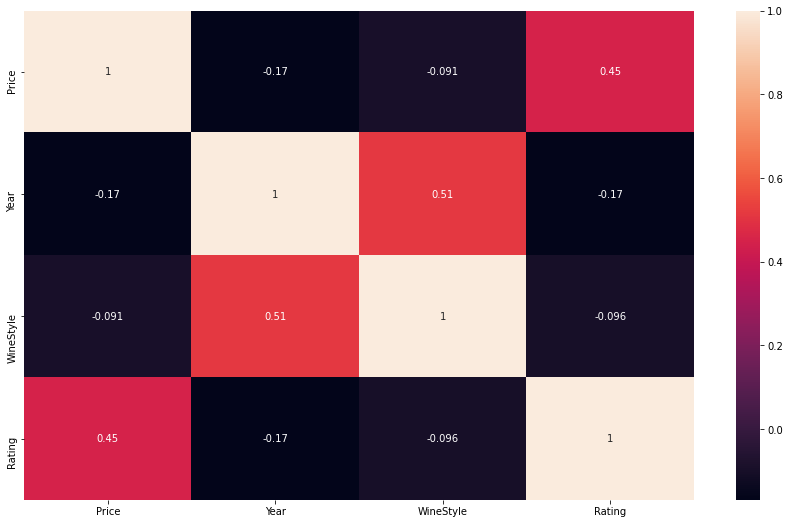

In [84]:
plt.figure(figsize=(15,9))
sns.heatmap(matrix, annot=True);

#### Key Takeaway:
- There is a significant correlation between ``WineStyle`` and ``Year``. Let's see where this takes us
- Moreover, there is no colinearity above 90%, so this means we don't have to worry about dropping any columns

### Exporting

In [80]:
train_dummy.to_csv("../data/train_dummy.csv")

# MODELS

We want to predict the ``Rating`` of the wines from the dataset given basic information such as the ``Country of Origin``, the ``Price``, the ``Year`` and of course, the ``Style`` of the wine.

To do so, we first separate the data into train and test and take ``Rating`` as the **target**.

We take 80% of the data into train and 20% data into test.

In [169]:
X = train_dummy.drop(columns=["Rating"])
y = train_dummy["Rating"]


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)

#### Function to apply and check the models

In [170]:
def modeling(X_train, y_train, model, X_test, y_test):
    model.fit(X_train,y_train)
    y_pred_train=model.predict(X_train)
    y_pred_test=model.predict(X_test)
    
    r2_sc_train=r2_score(y_train, y_pred_train)
    r2_sc_test=r2_score(y_test, y_pred_test)
    rmse_train=(mean_squared_error(y_train, y_pred_train))**0.5
    rmse_test=(mean_squared_error(y_test, y_pred_test))**0.5
    
    return f"r2_score of the train data: {r2_sc_train}", f"r2_score of the test data: {r2_sc_test}", f"rmse of the train data: {rmse_train}", f"rmse of the test data: {rmse_test}"

## Linear Regression Model

### Linear Regression with 20% of data in TEST

In [171]:
linr = LinearRegression()
modeling(X_train, y_train, linr, X_test, y_test)

('r2_score of the train data: 0.2333397558421647',
 'r2_score of the test data: 0.2545163747828979',
 'rmse of the train data: 0.2588910502577271',
 'rmse of the test data: 0.25817288623927137')

#### Key Takeaway:
- This model only reveals that around 25% of the data fits the regression model, which is not very accurate.
- Let's cross validate these metrics, and try other models

#### Cross validation with TRAIN

Choosing the scorers

In [167]:
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [168]:
scores_rmse = cross_val_score(linr, X_train, y_train, cv=3, scoring="neg_root_mean_squared_error")
scores_rmse

array([-73.82829063, -56.57356165, -56.99013743])

In [127]:
scores_r2 = cross_val_score(linr, X_train, y_train, cv=3, scoring="r2")
scores_r2

array([0.28766191, 0.2626456 , 0.17384759])

#### Key Takeaway:
- With cross validation we can check wether the metrics we got from the model are random or not. In this case, numbers are very similar, meaning that the scores obtained from the *Linear Regression* model are **not random**
- Nevertheless, the model is not well fitted, so let's try other models

## K Neighbors Regression

Applying the model

In [118]:
kneigh = KNeighborsRegressor(n_neighbors=2)
modeling(X_train, y_train, kneigh, X_test, y_test)

('r2_score of the train data: 0.7968552584428761',
 'r2_score of the test data: 0.44115922097961036',
 'rmse of the train data: 0.13318359261292248',
 'rmse of the test data: 0.2243188299662165')

Cross-validating

In [119]:
scoresKN = cross_val_score(kneigh, X_train, y_train, cv=3, scoring="neg_root_mean_squared_error")
scoresKN

array([-0.22251306, -0.22644225, -0.2261158 ])

#### Key Takeaway:
- With this model we can see that the r2 is significantly higher than the one from the Linear Regression model, however, let's split the data differently and check whether the r2 improves

### Splitting data into train and test with 25%

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)

#### Function that runs KNN for various values of n_neighbors and stores results

In [153]:
knn_r_acc = []

for i in range(1,26,1):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    test_score = knn.score(X_test,y_test)
    train_score = knn.score(X_train,y_train)
    knn_r_acc.append((i, test_score, train_score))

#### Let's see how these scores vary as we increase the value of n_neighbors (or K)

In [154]:
knr = pd.DataFrame(knn_r_acc, columns=['K','Test Score','Train Score'])
knr

,K,Test Score,Train Score
0,1,0.170059,0.909761
1,2,0.381669,0.802677
2,3,0.445806,0.749012
3,4,0.473693,0.716951
4,5,0.496030,0.698385
5,6,0.510318,0.685561
6,7,0.522404,0.676337
7,8,0.528674,0.669049
8,9,0.530306,0.661130
9,10,0.535778,0.656084


#### Key Takeaway:
- At K=1, the KNN tends to closely follow the training data and thus shows a high training score. However, in comparison, the test score is quite low, thus indicating **overfitting**
- at K=25, the model fits better, but even so, it's still overfitted (Train Score > Test Score). Let's try other models

## Random Forest

Applying the model at 25% split

In [140]:
ranf = RandomForestRegressor()
modeling(X_train, y_train, ranf, X_test, y_test)

('r2_score of the train data: 0.9027705791078591',
 'r2_score of the test data: 0.5384747614224232',
 'rmse of the train data: 0.09226294397418647',
 'rmse of the test data: 0.20244052701836396')

Cross-validating

In [141]:
scoresRF = cross_val_score(ranf, X_train, y_train, cv=3, scoring="neg_root_mean_squared_error")
scoresRF

array([-0.20145539, -0.20199572, -0.20477386])

#### Checking with 20% of the TEST data

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)

In [146]:
ranf = RandomForestRegressor()
modeling(X_train, y_train, ranf, X_test, y_test)

('r2_score of the train data: 0.9050759649630272',
 'r2_score of the test data: 0.4983383469724566',
 'rmse of the train data: 0.09178389053849387',
 'rmse of the test data: 0.20567180742661514')

In [147]:
scoresRF = cross_val_score(ranf, X_train, y_train, cv=3, scoring="neg_root_mean_squared_error")
scoresRF

array([-0.20124615, -0.20357788, -0.19811375])

#### Key Takeaway:
- In both cases, the r2 is higher (90%) compared to the previous models. However, it's still very **overfitted** (Train Score > Test Score). Let's try to fix that

## GridSearchCV

### Optimizing the model with GridSearch

In [158]:
params = {'min_samples_leaf':np.arange(20,50,5),
          'min_samples_split':np.arange(20,50,5),
          'max_depth':np.arange(3,6),
          'min_weight_fraction_leaf':np.arange(0,0.4,0.1)}

grid_search = RandomizedSearchCV(ranf, 
                                 params, 
                                 cv=5, 
                                 verbose=10, 
                                 scoring='neg_root_mean_squared_error')

In [ ]:
#grid_search.fit(X_train,y_train)

In [161]:
grid_search.best_estimator_

RandomForestRegressor(max_depth=5, min_samples_leaf=30, min_samples_split=30)

### Testing Random Forest

In [162]:
ranf = RandomForestRegressor(min_samples_leaf=30,
          min_samples_split=30,
          max_depth=5)

modeling(X_train, y_train, ranf, X_test, y_test)

('r2_score of the train data: 0.586777111113122',
 'r2_score of the test data: 0.5578826020398386',
 'rmse of the train data: 0.19150078208158808',
 'rmse of the test data: 0.1930803666595831')

#### Key Takeaway:
- The scores are actually worse

## Standardization

Machine learning algorithms don't perform well when the input of numerical attributes have very different scales.

Standarization takes the max-min of each column and puts it on the same range.

#### Initializing

In [190]:
scaler = StandardScaler()
train_scaled = scaler.fit_transform(X_train)
train_scaled = pd.DataFrame(train_scaled,columns=X_train.columns)

test_scaled = scaler.fit_transform(X_test)
test_scaled = pd.DataFrame(test_scaled,columns=X_test.columns)

In [191]:
train_scaled.head()

,Price,Year,WineStyle,Country_Argentina,Country_Australia,Country_Austria,Country_Brazil,Country_Bulgaria,Country_Canada,Country_Chile,...,Country_Romania,Country_Slovakia,Country_Slovenia,Country_South Africa,Country_Spain,Country_Switzerland,Country_Turkey,Country_United Kingdom,Country_United States,Country_Uruguay
0,0.151923,-0.165302,0.654449,-0.152647,-0.151402,-0.192891,-0.057918,-0.013444,-0.016467,-0.178572,...,-0.053,-0.013444,-0.032947,-0.255664,-0.351988,-0.03805,-0.026896,-0.016467,-0.202756,-0.016467
1,-0.340325,0.071513,-0.669643,-0.152647,-0.151402,-0.192891,-0.057918,-0.013444,-0.016467,-0.178572,...,-0.053,-0.013444,-0.032947,-0.255664,-0.351988,-0.03805,-0.026896,-0.016467,-0.202756,-0.016467
2,0.684096,-0.520524,-0.669643,-0.152647,-0.151402,5.184262,-0.057918,-0.013444,-0.016467,-0.178572,...,-0.053,-0.013444,-0.032947,-0.255664,-0.351988,-0.03805,-0.026896,-0.016467,-0.202756,-0.016467
3,-0.229191,-0.046894,-0.669643,-0.152647,-0.151402,-0.192891,-0.057918,-0.013444,-0.016467,-0.178572,...,-0.053,-0.013444,-0.032947,3.911390,-0.351988,-0.03805,-0.026896,-0.016467,-0.202756,-0.016467
4,-0.270955,-0.283709,0.654449,-0.152647,-0.151402,-0.192891,-0.057918,-0.013444,-0.016467,-0.178572,...,-0.053,-0.013444,30.352100,-0.255664,-0.351988,-0.03805,-0.026896,-0.016467,-0.202756,-0.016467


In [192]:
test_scaled.head()

,Price,Year,WineStyle,Country_Argentina,Country_Australia,Country_Austria,Country_Brazil,Country_Bulgaria,Country_Canada,Country_Chile,...,Country_Romania,Country_Slovakia,Country_Slovenia,Country_South Africa,Country_Spain,Country_Switzerland,Country_Turkey,Country_United Kingdom,Country_United States,Country_Uruguay
0,-0.175831,-0.284645,-0.664277,-0.143724,-0.161105,-0.188557,-0.068705,0.0,0.0,-0.182301,...,-0.046617,0.0,-0.046617,-0.253438,-0.357137,-0.050361,-0.026895,0.0,-0.186492,-0.026895
1,-0.209471,0.079766,0.675413,-0.143724,-0.161105,-0.188557,-0.068705,0.0,0.0,-0.182301,...,-0.046617,0.0,-0.046617,-0.253438,-0.357137,-0.050361,-0.026895,0.0,-0.186492,-0.026895
2,-0.334581,0.079766,0.675413,-0.143724,-0.161105,-0.188557,-0.068705,0.0,0.0,-0.182301,...,-0.046617,0.0,-0.046617,-0.253438,-0.357137,-0.050361,-0.026895,0.0,-0.186492,-0.026895
3,-0.208776,-0.284645,-0.664277,-0.143724,-0.161105,-0.188557,-0.068705,0.0,0.0,-0.182301,...,-0.046617,0.0,-0.046617,-0.253438,-0.357137,-0.050361,-0.026895,0.0,-0.186492,-0.026895
4,-0.298438,-0.041705,0.675413,-0.143724,-0.161105,-0.188557,-0.068705,0.0,0.0,-0.182301,...,-0.046617,0.0,-0.046617,-0.253438,-0.357137,-0.050361,-0.026895,0.0,-0.186492,-0.026895


In [ ]:
train_scaled['id'] = train['id']
train_scaled['Rating'] = train['price']
test_scaled['id'] = test['id']

In [ ]:
X_train = train_scaled.drop(columns = ['price','id'])
y_train = train.price
X_test = test_scaled.drop(columns = ['id'])

In [193]:
train_dummy.columns

Index(['Price', 'Year', 'WineStyle', 'Rating', 'Country_Argentina',
       'Country_Australia', 'Country_Austria', 'Country_Brazil',
       'Country_Bulgaria', 'Country_Canada', 'Country_Chile', 'Country_China',
       'Country_Croatia', 'Country_Czech Republic', 'Country_France',
       'Country_Georgia', 'Country_Germany', 'Country_Greece',
       'Country_Hungary', 'Country_Israel', 'Country_Italy', 'Country_Lebanon',
       'Country_Luxembourg', 'Country_Mexico', 'Country_Moldova',
       'Country_New Zealand', 'Country_Portugal', 'Country_Romania',
       'Country_Slovakia', 'Country_Slovenia', 'Country_South Africa',
       'Country_Spain', 'Country_Switzerland', 'Country_Turkey',
       'Country_United Kingdom', 'Country_United States', 'Country_Uruguay'],
      dtype='object')

In [194]:
test = train_dummy.drop("Rating", axis=1)

In [195]:
test.head()

,Price,Year,WineStyle,Country_Argentina,Country_Australia,Country_Austria,Country_Brazil,Country_Bulgaria,Country_Canada,Country_Chile,...,Country_Romania,Country_Slovakia,Country_Slovenia,Country_South Africa,Country_Spain,Country_Switzerland,Country_Turkey,Country_United Kingdom,Country_United States,Country_Uruguay
0,95.00,2011,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15.50,2017,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7.45,2015,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8.72,2019,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,29.15,2016,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [196]:
test.to_csv("../data/test_dummy.csv")